In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm
import warnings
#ignore warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"C:\Users\cheli\Downloads\mid term project data mining 1\train.csv")
test = pd.read_csv(r"C:\Users\cheli\Downloads\mid term project data mining 1\test.csv")
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# Skewness has to be equal to 0, Kurtosis has to be equal to 3 for normal distribution

In [6]:
print('Skewness: %f' % train['SalePrice'].skew())
print('Kurtosis: %f' % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


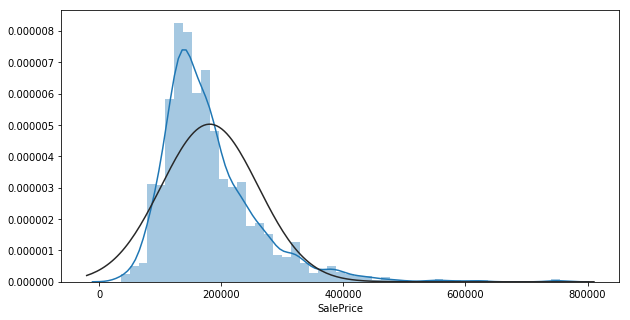

In [7]:
#Let's see on graph of data distribution in contrast with normal distribution
plt.subplots(figsize=(10, 5))
sns.distplot(train['SalePrice'], fit = norm)

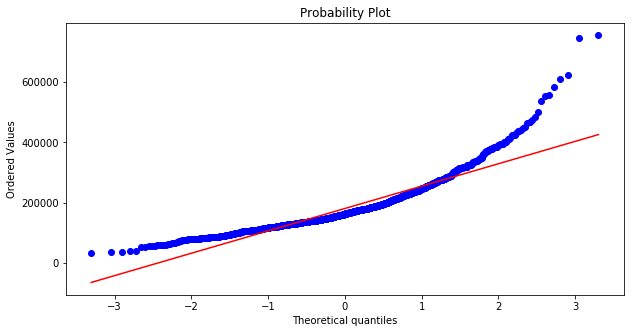

In [8]:
plt.subplots(figsize=(10, 5))
prob = stats.probplot(train['SalePrice'], plot=plt)

In [9]:
#To bring data closer to a normal distribution we are going to use logarithm

In [10]:
train['SalePrice'] = np.log(train['SalePrice'])

<Figure size 432x288 with 0 Axes>

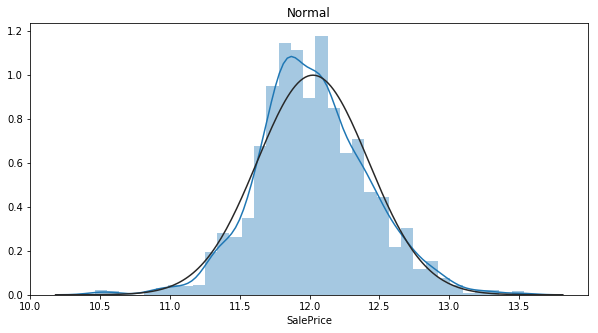

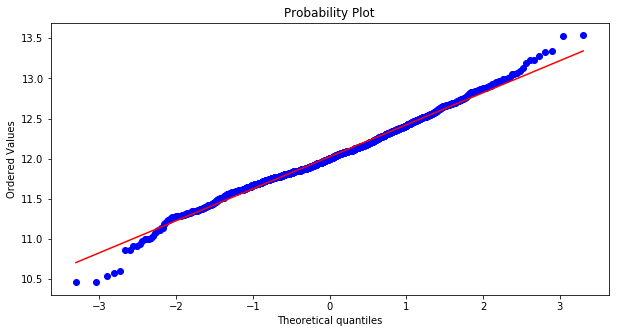

In [11]:
plt.figure(1)
plt.subplots(figsize=(10, 5))
sns.distplot(train['SalePrice'], fit = norm)
plt.title('Normal')
plt.figure(2)
plt.subplots(figsize=(10, 5))
prob = stats.probplot(train['SalePrice'], plot=plt)

In [12]:
#next we are going to plot the relationship of different predictors to each other

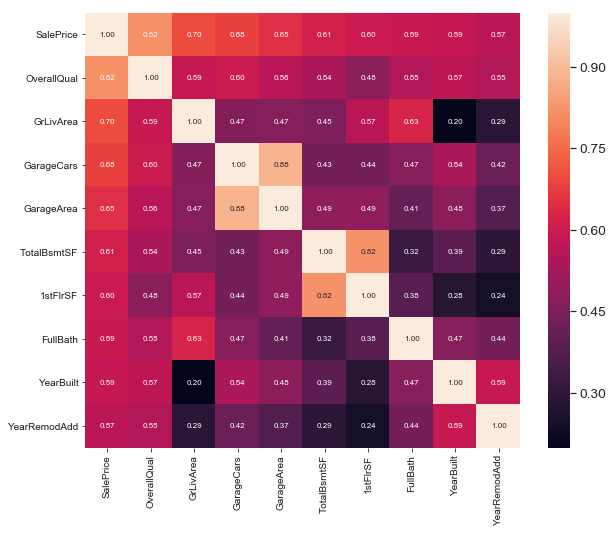

In [13]:
corrmat = train.corr()
plt.subplots(figsize=(10, 8))

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


Text(0.5,0,'GrLivArea')

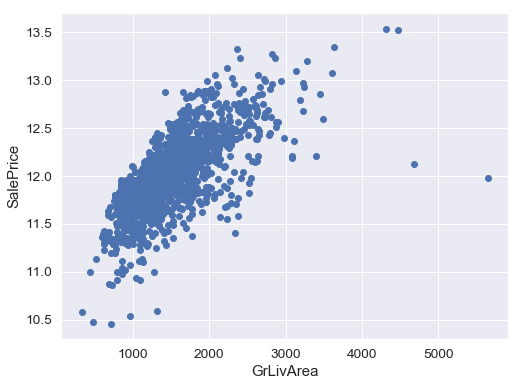

In [14]:
#Qualititative predictors:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
plt.subplots(figsize=(8, 6))
plt.scatter(x='GrLivArea', y="SalePrice", data=data)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')

Text(0.5,0,'TotalBsmtSF')

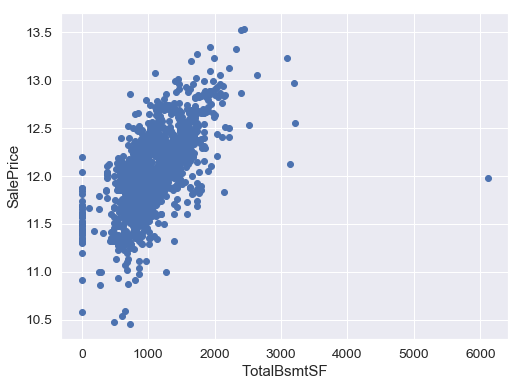

In [15]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
plt.subplots(figsize=(8, 6))
plt.scatter(x='TotalBsmtSF', y="SalePrice", data=data)
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')

Text(0.5,0,'GarageArea')

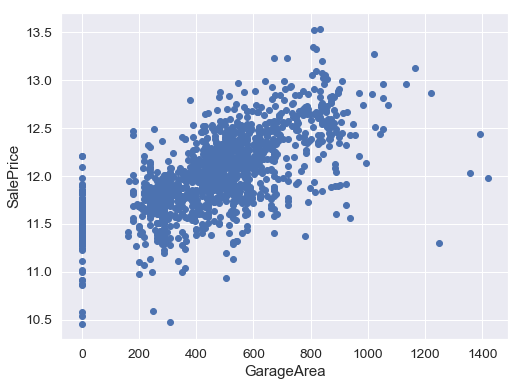

In [16]:
data = pd.concat([train['SalePrice'], train['GarageArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='GarageArea', y="SalePrice", data=data)
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')


In [17]:
#Last two predictors we considered as quantitative:

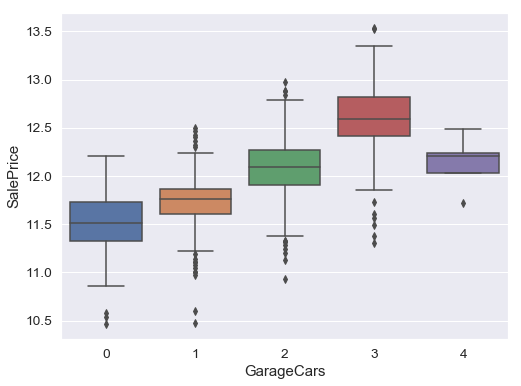

In [18]:
data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
plt.subplots(figsize=(8, 6))
sns.boxplot(x='GarageCars', y="SalePrice", data=data)

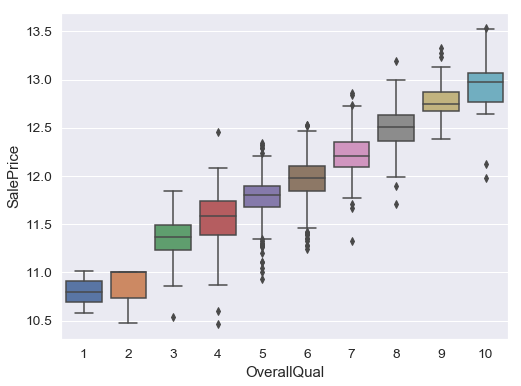

In [19]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
plt.subplots(figsize=(8, 6))
sns.boxplot(x='OverallQual', y="SalePrice", data=data)

In [20]:
#Union train and test into one general set to handle missing values
df = pd.concat([train, test])
df = df.drop(columns= ['SalePrice', 'Id'])
df.shape

(2919, 79)

# #Data Wrangling

In [21]:
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame({'Total': total})
missing_data = missing_data[missing_data['Total'] > 0]
missing_data

,Total
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageFinish,159
GarageQual,159
GarageYrBlt,159
GarageCond,159


In [22]:
df = pd.get_dummies(df)

In [23]:
df = df.fillna(df.mean())
# and check
df.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
BedroomAbvGr             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFullBath             0
BsmtHalfBath             0
BsmtUnfSF                0
EnclosedPorch            0
Fireplaces               0
FullBath                 0
GarageArea               0
GarageCars               0
GarageYrBlt              0
GrLivArea                0
HalfBath                 0
KitchenAbvGr             0
LotArea                  0
LotFrontage              0
LowQualFinSF             0
MSSubClass               0
MasVnrArea               0
MiscVal                  0
MoSold                   0
OpenPorchSF              0
OverallCond              0
OverallQual              0
PoolArea                 0
ScreenPorch              0
                        ..
RoofMatl_Metal           0
RoofMatl_Roll            0
RoofMatl_Tar&Grv         0
RoofMatl_WdShake         0
RoofMatl_WdShngl         0
RoofStyle_Flat           0
R

## Training

In [24]:
X_train = df[:train.shape[0]]
X_test = df[train.shape[0]:]
y_train = train[['SalePrice']]

In [25]:
##In order to predict SalePrice we are going to use a linear regularization model - 'Ridge'

In [29]:
from sklearn.linear_model import Ridge
params = {'max_iter': 50000}
ridge = Ridge(**params)
est = GridSearchCV(ridge, param_grid={"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
# number of params:
num = 100
print("Chosen parameter on %d datapoints: %s" % (num,est.fit(X_train[:num], y_train[:num]).best_params_))

Chosen parameter on 100 datapoints: {'alpha': 10.0}


In [30]:
params = {'alpha': 10.0, 'max_iter': 50000}
ridge = Ridge(**params)
# k-fold cross validation
kFold = 10 # number of sections

In [31]:
kf = KFold(n_splits=kFold, shuffle=True, random_state=2)
y_pr = np.zeros((X_train.shape[0],))

In [32]:
for train_index, test_index in kf.split(X_train):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]
    ridge.fit(X_tr, y_tr)
    #print(np.reshape(ridge.predict(X_te),-1))
    y_pr[test_index] = np.reshape(ridge.predict(X_te),-1) # in order to provide the same shape
err = sqrt(mean_squared_error(y_pr, y_train))
print("RMSE: %.5f" % err)

RMSE: 0.15178


##Prediction

In [33]:
y_pr = ridge.predict(X_test)
result = np.exp(y_pr)

In [34]:
result = np.reshape(result, -1)

In [35]:
result

array([114679.01163113, 146743.18620445, 168858.09427926, ...,
       157673.63000212, 112621.92910472, 227533.38865638])

In [37]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': result})
submission.to_csv("saleprice1.csv", index=None)